In [1]:
import anndata as ad
import pandas as pd
import sys
sys.path.append("../../scxmatch/src/")
from scxmatch import *
from utils import *
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import string
import scanpy as sc

found cupy installation, will try use the GPU to calculate the distance matrix.


In [2]:
k=None

In [3]:
bhatt_adata = ad.read_h5ad("/data_nfs/datasets/scrnaseq_ji/bhattacherjee.hdf5")
scanpy_setup(bhatt_adata)

AnnData object with n_obs × n_vars = 12936 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nGene', 'nUMI', 'percent.mito', 'replicate', 'Period', 'label', 'cell_type', 'subtype'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'counts'

In [4]:
reference="Maintenance_Cocaine"
test_groups = ["withdraw_48h_Cocaine", "withdraw_15d_Cocaine"]
bhatt_adata_48 = bhatt_adata[bhatt_adata.obs["label"].isin([test_groups[0], reference])]
bhatt_adata_15 = bhatt_adata[bhatt_adata.obs["label"].isin([test_groups[1], reference])]

In [5]:
kang_adata = ad.read_h5ad("kang_2018.hdf5")
scanpy_setup(kang_adata)

AnnData object with n_obs × n_vars = 24673 × 2000
    obs: 'nCount_RNA', 'nFeature_RNA', 'tsne1', 'tsne2', 'condition', 'cluster', 'cell_type', 'replicate', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.4', 'seurat_clusters'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'

In [6]:
sc.pp.neighbors(kang_adata, n_pcs=0, metric="sqeuclidean")
sc.pp.neighbors(bhatt_adata_48, n_pcs=0, metric="sqeuclidean")
sc.pp.neighbors(bhatt_adata_15, n_pcs=0, metric="sqeuclidean")

/data/bionets/je30bery/anaconda3/envs/gt-292/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
sc.tl.umap(kang_adata)
sc.tl.umap(bhatt_adata_48)
sc.tl.umap(bhatt_adata_15)

In [8]:
p_vals = dict()
z_scores = dict()
for cell_type in tqdm(kang_adata.obs["cell_type"].unique()):
    subset = kang_adata[kang_adata.obs["cell_type"] == cell_type]
    p, z, s = rosenbaum(subset, group_by="condition", reference="control", test_group="stimulated", k=k, return_matching=False, metric="sqeuclidean")      
    z_scores[cell_type] = z
    p_vals[cell_type] = p

/data_nfs/je30bery/rosenbaum_test/R_src/../../scxmatch/src/scxmatch/rosenbaum.py:154: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")


XMatch_group
reference    2932
test         2765
Name: count, dtype: int64
trying to use GPU to calculate distance matrix.
creating distance graph with 5698 samples


 12%|██████████████▏                                                                                                  | 1/8 [02:04<14:29, 124.22s/it]

counting cross matches.


/data_nfs/je30bery/rosenbaum_test/R_src/../../scxmatch/src/scxmatch/rosenbaum.py:154: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")


XMatch_group
test         5678
reference    5560
Name: count, dtype: int64
trying to use GPU to calculate distance matrix.
creating distance graph with 11238 samples
counting cross matches.


/data_nfs/je30bery/rosenbaum_test/R_src/../../scxmatch/src/scxmatch/rosenbaum.py:154: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")
 38%|██████████████████████████████████████████▍                                                                      | 3/8 [18:02<27:51, 334.20s/it]

XMatch_group
test         271
reference    258
Name: count, dtype: int64
trying to use GPU to calculate distance matrix.
creating distance graph with 530 samples
counting cross matches.


/data_nfs/je30bery/rosenbaum_test/R_src/../../scxmatch/src/scxmatch/rosenbaum.py:154: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")


XMatch_group
test         861
reference    855
Name: count, dtype: int64
trying to use GPU to calculate distance matrix.
creating distance graph with 1716 samples


 50%|████████████████████████████████████████████████████████▌                                                        | 4/8 [18:07<13:36, 204.13s/it]

counting cross matches.
XMatch_group
reference    811
test         810
Name: count, dtype: int64
trying to use GPU to calculate distance matrix.
creating distance graph with 1622 samples


/data_nfs/je30bery/rosenbaum_test/R_src/../../scxmatch/src/scxmatch/rosenbaum.py:154: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")
 62%|██████████████████████████████████████████████████████████████████████▋                                          | 5/8 [18:11<06:35, 131.97s/it]

counting cross matches.
XMatch_group
test         1335
reference    1316
Name: count, dtype: int64
trying to use GPU to calculate distance matrix.


/data_nfs/je30bery/rosenbaum_test/R_src/../../scxmatch/src/scxmatch/rosenbaum.py:154: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")


creating distance graph with 2652 samples


 75%|█████████████████████████████████████████████████████████████████████████████████████▌                            | 6/8 [18:33<03:09, 94.73s/it]

counting cross matches.
XMatch_group
test         569
reference    520
Name: count, dtype: int64
trying to use GPU to calculate distance matrix.
creating distance graph with 1090 samples


/data_nfs/je30bery/rosenbaum_test/R_src/../../scxmatch/src/scxmatch/rosenbaum.py:154: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")
/data_nfs/je30bery/rosenbaum_test/R_src/../../scxmatch/src/scxmatch/rosenbaum.py:154: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [18:35<00:00, 139.42s/it]

counting cross matches.
XMatch_group
test         69
reference    63
Name: count, dtype: int64
trying to use GPU to calculate distance matrix.
creating distance graph with 132 samples
counting cross matches.


In [9]:
mean_augur_auc = {'CD14+ Monocytes': 0.920476, 
                  'CD4 T cells': 0.669376, 
                  'Dendritic cells': 0.847007,
                  'NK cells': 0.673299, 
                  'CD8 T cells': 0.626247,
                  'B cells': 0.783628, 
                  'FCGR3A+ Monocytes': 0.888934, 
                  'Megakaryocytes': 0.512619}

In [10]:
kang_df = pd.DataFrame(mean_augur_auc.keys(), columns=["Cell type"])

In [11]:
kang_df["z"] = kang_df["Cell type"].apply(lambda x: z_scores[x])
kang_df["Mean Augur AUC"] = kang_df["Cell type"].apply(lambda x: mean_augur_auc[x])

In [12]:
p_vals = dict()
z_scores = dict()

for test_group in test_groups:
    p_vals[test_group] = dict()
    z_scores[test_group] = dict()

    for cell_type in tqdm(bhatt_adata.obs["cell_type"].unique()):
        subset = bhatt_adata[bhatt_adata.obs["cell_type"] == cell_type]
        p, z, s = rosenbaum(subset, group_by="label", reference=reference, test_group=test_group, k=k, return_matching=False, metric="sqeuclidean")      
        z_scores[test_group][cell_type] = z
        p_vals[test_group][cell_type] = p

/data_nfs/je30bery/rosenbaum_test/R_src/../../scxmatch/src/scxmatch/rosenbaum.py:154: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")


XMatch_group
test         270
reference    216
Name: count, dtype: int64
trying to use GPU to calculate distance matrix.
creating distance graph with 486 samples


 12%|██████████████▎                                                                                                   | 1/8 [00:00<00:02,  2.35it/s]

counting cross matches.
XMatch_group
reference    373
test         302
Name: count, dtype: int64
trying to use GPU to calculate distance matrix.
creating distance graph with 676 samples


/data_nfs/je30bery/rosenbaum_test/R_src/../../scxmatch/src/scxmatch/rosenbaum.py:154: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")
 25%|████████████████████████████▌                                                                                     | 2/8 [00:01<00:03,  1.91it/s]

counting cross matches.


/data_nfs/je30bery/rosenbaum_test/R_src/../../scxmatch/src/scxmatch/rosenbaum.py:154: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")


XMatch_group
test         1688
reference    1264
Name: count, dtype: int64
trying to use GPU to calculate distance matrix.
creating distance graph with 2952 samples
counting cross matches.


/data_nfs/je30bery/rosenbaum_test/R_src/../../scxmatch/src/scxmatch/rosenbaum.py:154: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")


XMatch_group
reference    478
test         477
Name: count, dtype: int64
trying to use GPU to calculate distance matrix.
creating distance graph with 956 samples


 50%|█████████████████████████████████████████████████████████                                                         | 4/8 [00:16<00:18,  4.51s/it]

counting cross matches.
XMatch_group
reference    409
test         147
Name: count, dtype: int64
trying to use GPU to calculate distance matrix.


/data_nfs/je30bery/rosenbaum_test/R_src/../../scxmatch/src/scxmatch/rosenbaum.py:154: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")


creating distance graph with 556 samples


 62%|███████████████████████████████████████████████████████████████████████▎                                          | 5/8 [00:16<00:09,  3.04s/it]

counting cross matches.
XMatch_group
test         227
reference    119
Name: count, dtype: int64
trying to use GPU to calculate distance matrix.
creating distance graph with 346 samples


/data_nfs/je30bery/rosenbaum_test/R_src/../../scxmatch/src/scxmatch/rosenbaum.py:154: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")
/data_nfs/je30bery/rosenbaum_test/R_src/../../scxmatch/src/scxmatch/rosenbaum.py:154: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")
 88%|███████████████████████████████████████████████████████████████████████████████████████████████████▊              | 7/8 [00:16<00:01,  1.47s/it]

counting cross matches.
XMatch_group
test         182
reference     82
Name: count, dtype: int64
trying to use GPU to calculate distance matrix.
creating distance graph with 264 samples
counting cross matches.


/data_nfs/je30bery/rosenbaum_test/R_src/../../scxmatch/src/scxmatch/rosenbaum.py:154: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:17<00:00,  2.14s/it]


XMatch_group
test         44
reference    35
Name: count, dtype: int64
trying to use GPU to calculate distance matrix.
creating distance graph with 80 samples
counting cross matches.


/data_nfs/je30bery/rosenbaum_test/R_src/../../scxmatch/src/scxmatch/rosenbaum.py:154: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")


XMatch_group
reference    216
test         213
Name: count, dtype: int64
trying to use GPU to calculate distance matrix.
creating distance graph with 430 samples


 12%|██████████████▎                                                                                                   | 1/8 [00:00<00:03,  2.12it/s]

counting cross matches.
XMatch_group
reference    373
test          99
Name: count, dtype: int64
trying to use GPU to calculate distance matrix.
creating distance graph with 472 samples


/data_nfs/je30bery/rosenbaum_test/R_src/../../scxmatch/src/scxmatch/rosenbaum.py:154: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")
 25%|████████████████████████████▌                                                                                     | 2/8 [00:00<00:02,  2.42it/s]

counting cross matches.


/data_nfs/je30bery/rosenbaum_test/R_src/../../scxmatch/src/scxmatch/rosenbaum.py:154: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")


XMatch_group
test         4789
reference    1264
Name: count, dtype: int64
trying to use GPU to calculate distance matrix.
creating distance graph with 6054 samples


 38%|██████████████████████████████████████████▊                                                                       | 3/8 [01:24<03:11, 38.25s/it]

counting cross matches.


/data_nfs/je30bery/rosenbaum_test/R_src/../../scxmatch/src/scxmatch/rosenbaum.py:154: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")


XMatch_group
test         753
reference    478
Name: count, dtype: int64
trying to use GPU to calculate distance matrix.
creating distance graph with 1232 samples


 50%|█████████████████████████████████████████████████████████                                                         | 4/8 [01:26<01:36, 24.06s/it]

counting cross matches.
XMatch_group
reference    409
test         240
Name: count, dtype: int64
trying to use GPU to calculate distance matrix.


/data_nfs/je30bery/rosenbaum_test/R_src/../../scxmatch/src/scxmatch/rosenbaum.py:154: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")


creating distance graph with 650 samples


/data_nfs/je30bery/rosenbaum_test/R_src/../../scxmatch/src/scxmatch/rosenbaum.py:154: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")
 75%|█████████████████████████████████████████████████████████████████████████████████████▌                            | 6/8 [01:27<00:20, 10.37s/it]

counting cross matches.
XMatch_group
reference    119
test          71
Name: count, dtype: int64
trying to use GPU to calculate distance matrix.
creating distance graph with 190 samples
counting cross matches.


/data_nfs/je30bery/rosenbaum_test/R_src/../../scxmatch/src/scxmatch/rosenbaum.py:154: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")


XMatch_group
test         357
reference     82
Name: count, dtype: int64
trying to use GPU to calculate distance matrix.
creating distance graph with 440 samples


/data_nfs/je30bery/rosenbaum_test/R_src/../../scxmatch/src/scxmatch/rosenbaum.py:154: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:27<00:00, 10.98s/it]

counting cross matches.
XMatch_group
test         101
reference     35
Name: count, dtype: int64
trying to use GPU to calculate distance matrix.
creating distance graph with 136 samples
counting cross matches.


In [26]:
aug_auc_15d = {"Oligo":         0.801417,
                "Astro":         0.769116,
                "Microglia":     0.743707,
                "OPC":           0.743605,
                "Inhibitory":    0.656202,
                "NF Oligo":      0.625692,
                "Excitatory":    0.623923,
                "Endo":          0.588481}

In [27]:
aug_auc_48h = {"Astro":         0.624898,
                "OPC":           0.598050,
                "NF Oligo":      0.592619,
                "Microglia":     0.587789,
                "Inhibitory":    0.560000,
                "Oligo":         0.557630,
                "Endo":          0.540272,
                "Excitatory":    0.527143}

In [28]:
bhat_df_48 = pd.DataFrame(aug_auc_15d.keys(), columns=["Cell type"])
bhat_df_15 = pd.DataFrame(aug_auc_15d.keys(), columns=["Cell type"])

In [29]:
bhat_df_48["z"] = bhat_df_48["Cell type"].apply(lambda x: z_scores["withdraw_48h_Cocaine"][x])
bhat_df_15["z"] = bhat_df_48["Cell type"].apply(lambda x: z_scores["withdraw_15d_Cocaine"][x])

In [30]:
bhat_df_48["Mean Augur AUC"] =  bhat_df_48["Cell type"].apply(lambda x: aug_auc_48h[x])
bhat_df_15["Mean Augur AUC"] =  bhat_df_15["Cell type"].apply(lambda x: aug_auc_15d[x])

In [31]:
pal = sns.color_palette("colorblind", len(kang_adata.obs["cell_type"].unique()))
pal_ct = {ct: pal[i] for i, ct in enumerate(kang_adata.obs["cell_type"].unique())}

pal = sns.color_palette("colorblind", len(bhatt_adata_48.obs["cell_type"].unique()))
pal_ct_48 = {ct: pal[i] for i, ct in enumerate(bhatt_adata_48.obs["cell_type"].unique())}

pal = sns.color_palette("colorblind", len(bhatt_adata_15.obs["cell_type"].unique()))
pal_ct_15 = {ct: pal[i] for i, ct in enumerate(bhatt_adata_15.obs["cell_type"].unique())}

In [32]:
kang_adata.obs["condition"].values

['control', 'control', 'control', 'control', 'control', ..., 'stimulated', 'stimulated', 'stimulated', 'stimulated', 'stimulated']
Length: 24673
Categories (2, object): ['control', 'stimulated']

In [33]:
umap_df_kang = pd.DataFrame(np.array([kang_adata.obsm["X_umap"][:,0], kang_adata.obsm["X_umap"][:,1], kang_adata.obs["condition"].values, kang_adata.obs["cell_type"].values]).T, columns=["x", "y", "Label", "Cell type"])
umap_df_b48 = pd.DataFrame(np.array([bhatt_adata_48.obsm["X_umap"][:,0], bhatt_adata_48.obsm["X_umap"][:,1], bhatt_adata_48.obs["label"].values, bhatt_adata_48.obs["cell_type"].values]).T, columns=["x", "y", "Label", "Cell type"])
umap_df_b15 = pd.DataFrame(np.array([bhatt_adata_15.obsm["X_umap"][:,0], bhatt_adata_15.obsm["X_umap"][:,1], bhatt_adata_15.obs["label"].values, bhatt_adata_15.obs["cell_type"].values]).T, columns=["x", "y", "Label", "Cell type"])

In [34]:
umap_df_kang.replace({"control": "Control", "stimulated": "Stimulated"}, inplace=True)
umap_df_b48.replace({"Maintenance_Cocaine": "Maint. cocaine", "withdraw_48h_Cocaine": "Withdraw 48h"}, inplace=True)
umap_df_b15.replace({"Maintenance_Cocaine": "Maint. cocaine", "withdraw_15d_Cocaine": "Withdraw 15d"}, inplace=True)

/tmp/ipykernel_3822527/328713016.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  umap_df_kang.replace({"control": "Control", "stimulated": "Stimulated"}, inplace=True)
/tmp/ipykernel_3822527/328713016.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  umap_df_b48.replace({"Maintenance_Cocaine": "Maint. cocaine", "withdraw_48h_Cocaine": "Withdraw 48h"}, inplace=True)
/tmp/ipykernel_3822527/328713016.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old b

In [35]:
pal1 = {"Control": "grey", "Stimulated": "black"}
pal2 = {"Maint. cocaine": "grey", "Withdraw 48h": "black", "Withdraw 15d": "black"}

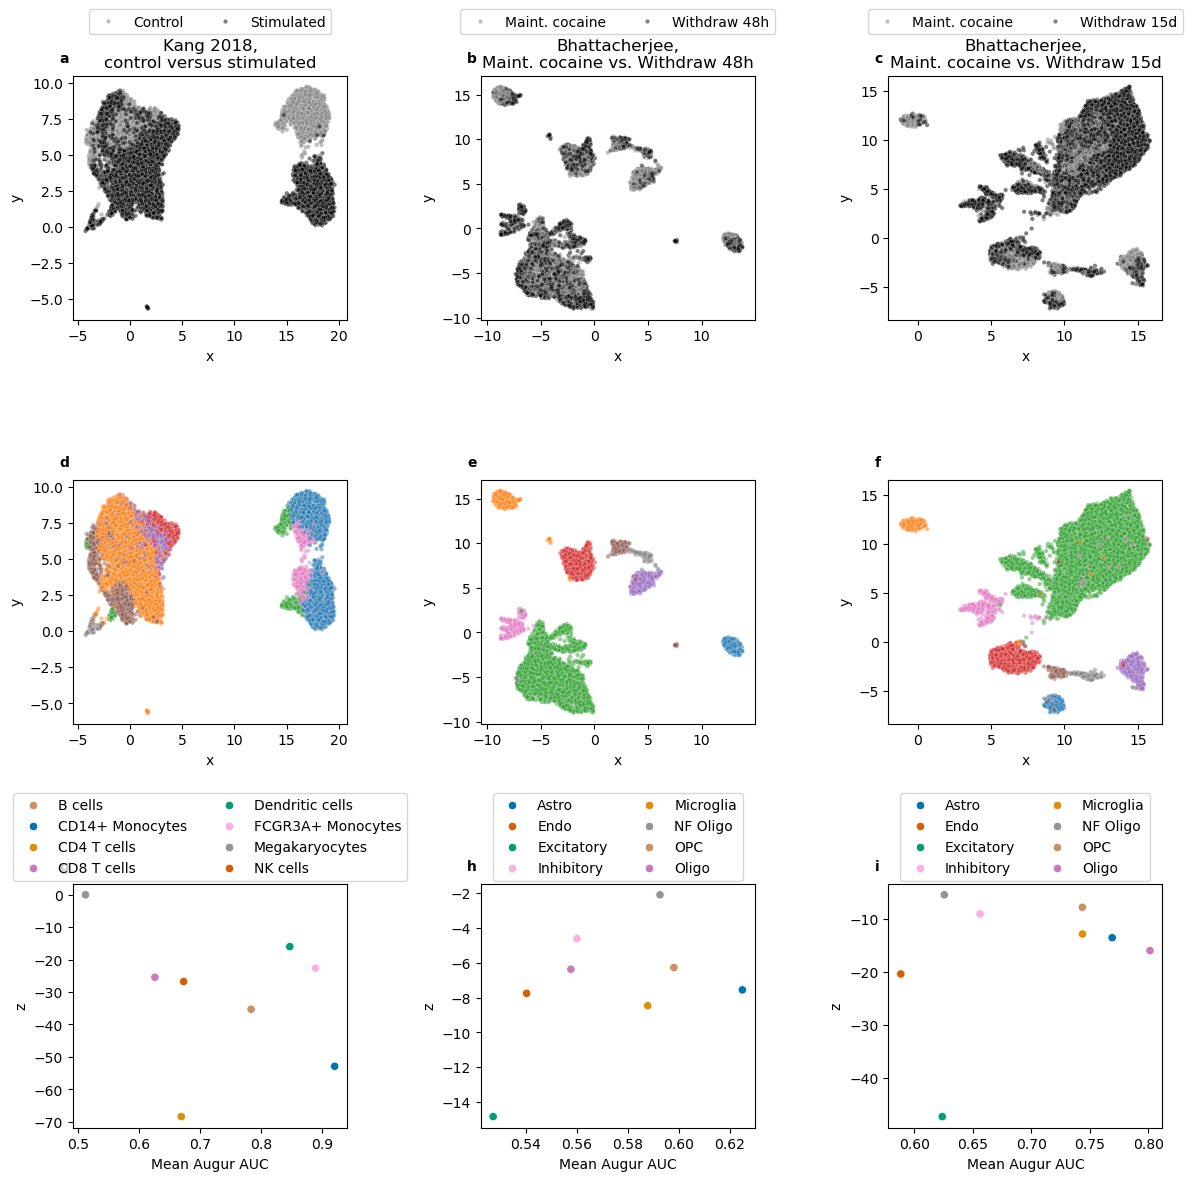

In [36]:
f, axs = plt.subplots(3, 3, figsize=(12, 12))

s = 10
sns.scatterplot(umap_df_kang, x="x", y="y", hue="Label", ax=axs[0, 0], alpha=0.5, s=s, palette=pal1)
sns.scatterplot(umap_df_b48, x="x", y="y", hue="Label", ax=axs[0, 1], alpha=0.5, s=s, palette=pal2, hue_order=["Maint. cocaine", "Withdraw 48h"])
sns.scatterplot(umap_df_b15, x="x", y="y", hue="Label", ax=axs[0, 2], alpha=0.5, s=s, palette=pal2, hue_order=["Maint. cocaine", "Withdraw 15d"])
axs[0, 0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2)
axs[0, 1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2)
axs[0, 2].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2)


sns.scatterplot(umap_df_kang, x="x", y="y", hue="Cell type", ax=axs[1, 0], alpha=0.5, s=s, legend=False)
sns.scatterplot(umap_df_b48, x="x", y="y", hue="Cell type", ax=axs[1, 1], alpha=0.5, s=s, legend=False)
sns.scatterplot(umap_df_b15, x="x", y="y", hue="Cell type", ax=axs[1, 2], alpha=0.5, s=s, legend=False)

sns.scatterplot(kang_df, y="z", x="Mean Augur AUC", hue="Cell type", ax=axs[2, 0], hue_order=sorted(kang_df["Cell type"].unique()), palette=pal_ct)

sns.scatterplot(bhat_df_48, y="z", x="Mean Augur AUC", hue="Cell type", ax=axs[2, 1], hue_order=sorted(bhat_df_48["Cell type"].unique()), palette=pal_ct_48)

sns.scatterplot(bhat_df_15, y="z", x="Mean Augur AUC", hue="Cell type", ax=axs[2, 2], hue_order=sorted(bhat_df_15["Cell type"].unique()), palette=pal_ct_15)

axs[0, 0].set_title("Kang 2018,\ncontrol versus stimulated")
axs[0, 1].set_title(f"Bhattacherjee,\nMaint. cocaine vs. Withdraw 48h")
axs[0, 2].set_title(f"Bhattacherjee,\nMaint. cocaine vs. Withdraw 15d")

axs[2, 0].legend(ncols=len(mean_augur_auc) // 4, loc='upper center', bbox_to_anchor=(0.5, 1.4))
axs[2, 1].legend(ncols=len(aug_auc_48h) // 4, loc='upper center', bbox_to_anchor=(0.5, 1.4))
axs[2, 2].legend(ncols=len(aug_auc_15d) // 4, loc='upper center', bbox_to_anchor=(0.5, 1.4))

labels = string.ascii_lowercase  

for i in range(np.prod(axs.shape)):
    x, y = i // 3, i % 3
    axs[x, y].text(
        -0.05, 1.1,  # Position (normalized figure coordinates)
        labels[i],   # Corresponding letter
        transform=axs[x, y].transAxes,  # Relative to subplot
        fontsize=10, fontweight='bold', va='top', ha='left'
    )
    
plt.tight_layout()
plt.savefig("augur_figure.pdf")

In [25]:

#axs[0,0].scatter(x=kang_adata.obsm["X_umap"][:,0], y=kang_adata.obsm["X_umap"][:,1], alpha=0.5, s=2, c=colors_condition)
#axs[1,0].scatter(x=kang_adata.obsm["X_umap"][:,0], y=kang_adata.obsm["X_umap"][:,1], alpha=0.5, s=2, c=colors_celltype)

#axs[0,1].scatter(x=bhatt_adata_48.obsm["X_umap"][:,0], y=bhatt_adata_48.obsm["X_umap"][:,1], alpha=0.5, s=2, c=colors_label_48)
#axs[1,1].scatter(x=bhatt_adata_48.obsm["X_umap"][:,0], y=bhatt_adata_48.obsm["X_umap"][:,1], alpha=0.5, s=2, c=colors_celltype_48)

#axs[0,2].scatter(x=bhatt_adata_15.obsm["X_umap"][:,0], y=bhatt_adata_15.obsm["X_umap"][:,1], alpha=0.5, s=2, c=colors_label_15)
#axs[1,2].scatter(x=bhatt_adata_15.obsm["X_umap"][:,0], y=bhatt_adata_15.obsm["X_umap"][:,1], alpha=0.5, s=2, c=colors_celltype_15)
